# Long Short Term Memory

<div style="display: flex; align-items: center;">
    <img src="../imgs/LSTM.jpg" alt="Your Image" width="600" style="margin-right: 20px;">
    <div>
        <p>LSTM (Long Short Term Memory) is an improved recurrent neural network (RNN) architecture aimed at solving the problems of vanishing and exploding gradients in traditional RNNs, as well as enhancing the modeling ability for long-term dependencies. LSTM introduces a memory cell that can store and access information, and controls the flow of information through gating mechanisms. The key components of LSTM include input gates, forget gates, and output gates.</p>
    </div>
</div>

### **Input gate**
The first step of LSTM is to determine what kind of information we need to discard from the cell state. This decision is determined by a sigmoid layer called a forget gate.For example, for a language model that predicts the last word based on the previous text. The state of the cell may contain information about the current topic to predict the next accurate word. When we acquire a new language theme, we tend to forget the memory of the old theme and apply information from the new language theme to predict accurate words.

### **Forget gate**
The second step is to determine what kind of information we need to store in the cell state. This question has two parts. Firstly, the sigmoid layer calls the input gate to determine which data needs to be updated. For example, a language model can be expressed as wanting to add new language topic information to the cell state to replace the old memory information we need to forget.

### **Output gate**
Finally, we need to decide what to output. This output is based on our cell state, but it will be a filtered value. Firstly, we run a sigmoid layer, which is the output gate, to determine which part of the cell state we will output. Then we put the cell state into tanh (pressing the value between -1 and 1), and finally multiply it with the output of the sigmoid gate, so we only output the part we want.

## LSTM
Before building the model, let's review the parameters of the new layer:

**nn.LSTM** is a long short-term memory (LSTM) module implemented in PyTorch. It is used to construct neural network layers with LSTM units. The common parameters are as follows:

`input_size`: The size of the input features.

`hidden_size`: The number of features in the hidden state.

`num_layers`: (optional) The number of LSTM layers. Default is 1.

`bias`: (optional) Whether to include bias terms. Default is True.

`batch_first`: (optional) If True, input and output tensors are provided as (batch, seq, feature). If False, input and output tensors are provided as (seq, batch, feature). Default is False.

`dropout`: (optional) If non-zero, applies dropout to the LSTM output. Default is 0.

`bidirectional`: (optional) If True, creates a bidirectional LSTM. Default is False.

In [1]:
import torch
import torch.nn as nn

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size = input_size, 
                            num_layers = 2,
                            hidden_size = hidden_size,  
                            batch_first = True)
        
        self.fc = nn.Linear(hidden_size, output_size) 
        
    def forward(self, x):  
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

## Train LSTM on ClimateTrainer

The `ClimateTrainer` class is designed to facilitate training and evaluation of models on the diy time-climate dataset. It provides functionalities for model training, validation, testing, and plotting training progress.

Parameters:<br>
- `model`: The model to be trained. It should be an instance of a PyTorch nn.Module.<br>
- `lr`: The learning rate used by the optimizer for updating model parameters during training.<br>
- `loss`: The loss function used to calculate the discrepancy between predicted and actual values during training.It could be one of the following: `MSE`, `CE`, `BCE`, `Logistic` or `MAE`.<br>
- `optimizer`: The optimization algorithm used to update model parameters during training. It could be one of the following: `SGD`, `Adam`, `RMSprop`, `AdamW`, `Adagrad`, or `Adadelta`.<br>
- `epoch`: The number of training epochs, i.e., the number of times the entire dataset is passed through the model during training.<br>
- `samples`: The number of the size of dataset. Defualt is 5000.
- `seed`: The random seed used for reproducibility. Defualt is 1234.<br>

2024-05-16 14:39:08
Epoch 1 / 10


[Valid]: 100%|██████████████████████████████████| 882/882 [00:02<00:00, 314.93it/s, val_loss=0.0123]


2024-05-16 14:40:05
Epoch 2 / 10


[Valid]: 100%|█████████████████████████████████| 882/882 [00:03<00:00, 290.53it/s, val_loss=0.00519]


2024-05-16 14:41:06
Epoch 3 / 10


[Valid]: 100%|█████████████████████████████████| 882/882 [00:03<00:00, 282.86it/s, val_loss=0.00589]


2024-05-16 14:42:11
Epoch 4 / 10


[Valid]: 100%|█████████████████████████████████| 882/882 [00:03<00:00, 277.04it/s, val_loss=0.00516]


2024-05-16 14:43:19
Epoch 5 / 10


[Valid]: 100%|█████████████████████████████████| 882/882 [00:03<00:00, 276.48it/s, val_loss=0.00506]


2024-05-16 14:44:27
Epoch 6 / 10


[Valid]: 100%|█████████████████████████████████| 882/882 [00:03<00:00, 283.43it/s, val_loss=0.00547]


2024-05-16 14:45:34
Epoch 7 / 10


[Valid]: 100%|█████████████████████████████████| 882/882 [00:03<00:00, 269.79it/s, val_loss=0.00492]


2024-05-16 14:46:42
Epoch 8 / 10


[Valid]: 100%|██████████████████████████████████| 882/882 [00:03<00:00, 267.81it/s, val_loss=0.0051]


2024-05-16 14:47:51
Epoch 9 / 10


[Valid]: 100%|█████████████████████████████████| 882/882 [00:03<00:00, 275.92it/s, val_loss=0.00535]


2024-05-16 14:48:59
Epoch 10 / 10


[Valid]: 100%|█████████████████████████████████| 882/882 [00:03<00:00, 270.88it/s, val_loss=0.00521]


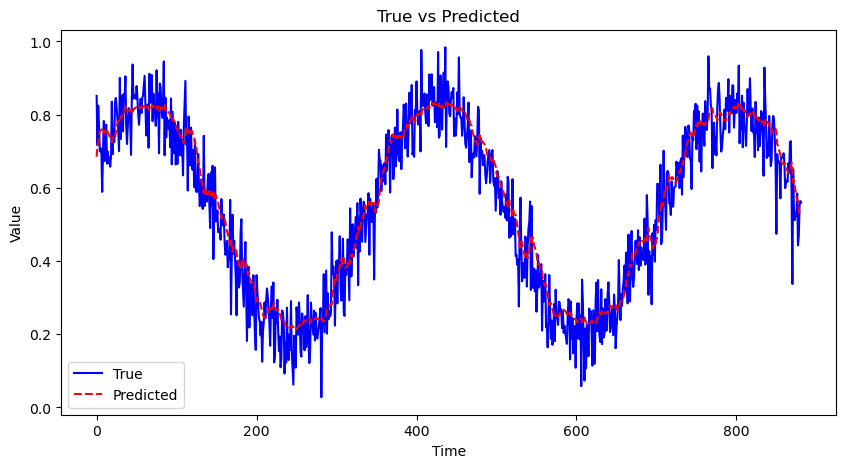

In [7]:
model = LSTM(input_size=1, hidden_size=256, output_size=1)

import sys
sys.path.append('../tools')
from TimeClimate import ClimateTrainer

trainer = ClimateTrainer(model, loss='MSE', lr=0.001, optimizer='Adam', epoch=10)
trainer.train()

Testing [Test]: 100%|████████████████████████████████████████████| 883/883 [00:02<00:00, 304.39it/s, test_loss=0.00477]


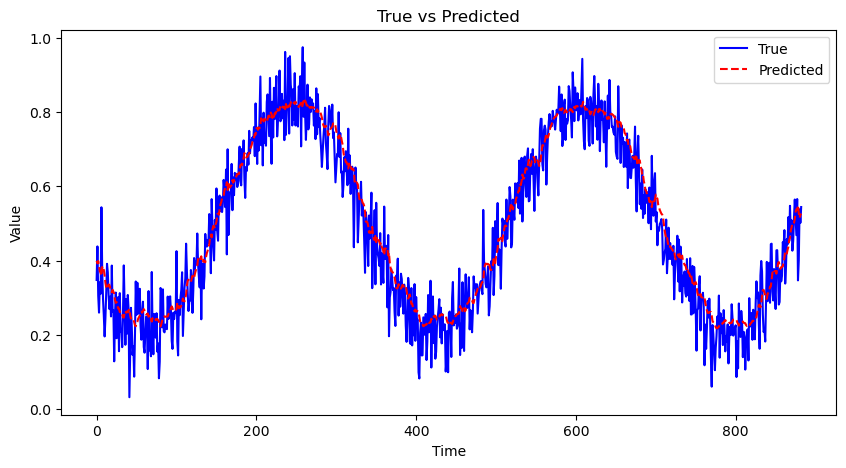

In [8]:
trainer.test()